# Lunch & Learn Session: Stock Price prediction

---------------------------------------------------------------------------------------------------------------------
### Referance
- Data : Kaggle DJIA 30 Stock Time Series (https://www.kaggle.com/szrlee/stock-time-series-20050101-to-20171231)
- Notenooks referred : 
 https://www.kaggle.com/thebrownviking20/everything-you-can-do-with-a-time-series#data
 https://www.kaggle.com/kashnitsky/topic-9-part-1-time-series-analysis-in-python

 

### Motivation 
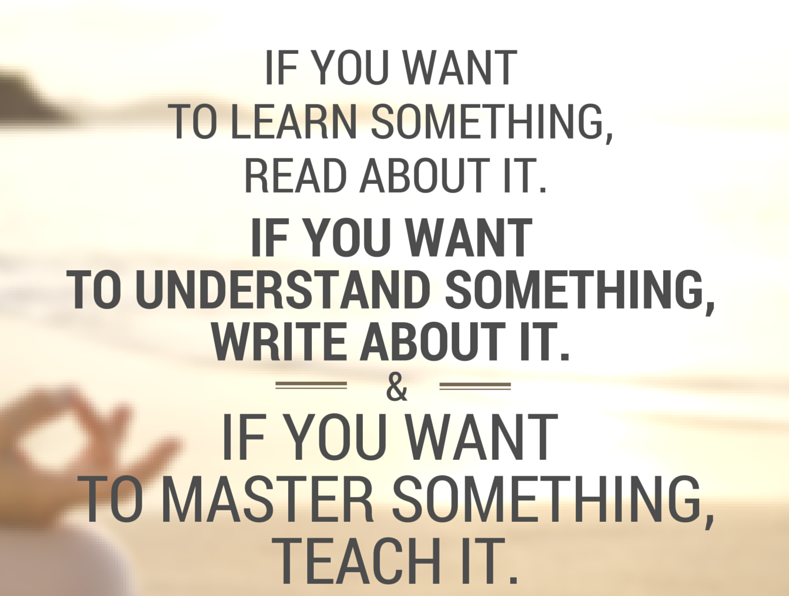

In [68]:
#Importing Libraries
import os
import sys
import glob
import pandas as pd
import numpy as np
import datetime
from datetime import datetime as dt
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
# Above is a special style template for matplotlib, highly useful for visualizing time series data

%matplotlib inline
from pylab import rcParams
from plotly import tools
import chart_studio.plotly as py
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.figure_factory as ff
import statsmodels.api as sm
from numpy.random import normal, seed
from scipy.stats import norm
from statsmodels.tsa.arima_model import ARMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.tsa.arima_model import ARIMA
import math
from sklearn.metrics import mean_squared_error

# Data 
- Data being used:-
- IBM Stocks Data
- Google Stocks Data
- Microsoft Stocks Data

In [24]:
import glob, os
os.chdir(sys.path[0]+"/stock-time-series-20050101-to-20171231")
IBM_PATH=None
for file in glob.glob("*.csv"):
    if 'GOOGL' in file:
        print(file)


GOOGL_2006-01-01_to_2018-01-01.csv


In [21]:
import glob, os
os.chdir(sys.path[0]+"/stock-time-series-20050101-to-20171231")
IBM_PATH=None
for file in glob.glob("*.csv"):
    if 'IBM' in file:
        IBM_PATH = file
        print(IBM_PATH)
#         print('Stock Prices for', file.split('_')[0], 'during' , file.split('_')[1], 'to', file.split('_')[3])
    
# Lets start analyzing big tech companies stock market data
ibm = pd.read_csv(IBM_PATH, index_col=0)
ibm.head()

IBM_2006-01-01_to_2018-01-01.csv


,Open,High,Low,Close,Volume,Name
Date,,,,,,
2006-01-03,82.45,82.55,80.81,82.06,11715200,IBM
2006-01-04,82.20,82.50,81.33,81.95,9840600,IBM
2006-01-05,81.40,82.90,81.00,82.50,7213500,IBM
2006-01-06,83.95,85.03,83.41,84.95,8197400,IBM
2006-01-09,84.10,84.25,83.38,83.73,6858200,IBM


In [5]:
os.chdir(sys.path[0]+'/historical-hourly-weather-data')
for file in glob.glob("*.csv"):
    print(file) 

weather_description.csv
humidity.csv
wind_direction.csv
temperature.csv
pressure.csv
city_attributes.csv
wind_speed.csv


In [6]:
humidity = pd.read_csv('../historical-hourly-weather-data/humidity.csv',index_col='datetime',parse_dates=['datetime'])
weather_description = pd.read_csv('../historical-hourly-weather-data/weather_description.csv',index_col='datetime',parse_dates=['datetime'])
wind_direction = pd.read_csv('../historical-hourly-weather-data/wind_direction.csv',index_col='datetime',parse_dates=['datetime'])
temperature = pd.read_csv('../historical-hourly-weather-data/temperature.csv',index_col='datetime',parse_dates=['datetime'])
pressure = pd.read_csv('../historical-hourly-weather-data/pressure.csv',index_col='datetime',parse_dates=['datetime'])
wind_speed = pd.read_csv('../historical-hourly-weather-data/wind_speed.csv',index_col='datetime',parse_dates=['datetime'])
print(humidity.shape)
humidity.tail()

(45253, 36)


,Vancouver,Portland,San Francisco,Seattle,Los Angeles,San Diego,Las Vegas,Phoenix,Albuquerque,Denver,...,Philadelphia,New York,Montreal,Boston,Beersheba,Tel Aviv District,Eilat,Haifa,Nahariyya,Jerusalem
datetime,,,,,,,,,,,,,,,,,,,,,
2017-11-29 20:00:00,NaN,81.0,NaN,93.0,24.0,72.0,18.0,68.0,37.0,18.0,...,27.0,NaN,64.0,37.0,NaN,NaN,NaN,NaN,NaN,NaN
2017-11-29 21:00:00,NaN,71.0,NaN,87.0,21.0,72.0,18.0,73.0,34.0,12.0,...,29.0,NaN,59.0,74.0,NaN,NaN,NaN,NaN,NaN,NaN
2017-11-29 22:00:00,NaN,71.0,NaN,93.0,23.0,68.0,17.0,60.0,32.0,15.0,...,31.0,NaN,66.0,74.0,NaN,NaN,NaN,NaN,NaN,NaN
2017-11-29 23:00:00,NaN,71.0,NaN,87.0,14.0,63.0,17.0,33.0,30.0,28.0,...,26.0,NaN,58.0,56.0,NaN,NaN,NaN,NaN,NaN,NaN
2017-11-30 00:00:00,NaN,76.0,NaN,75.0,56.0,72.0,17.0,23.0,34.0,31.0,...,32.0,NaN,58.0,56.0,NaN,NaN,NaN,NaN,NaN,NaN


##  Data Quality

In [7]:
ibm[ibm.Open.isna()]

,Open,High,Low,Close,Volume,Name
Date,,,,,,
2017-07-31,NaN,144.93,NaN,144.67,4355718,IBM


In [8]:
# %Missing data
round(humidity.isna().sum()/len(humidity)*100, 2).sort_values(ascending=False)

Vancouver            4.04
Denver               4.00
Montreal             3.75
New York             3.59
Phoenix              2.89
Saint Louis          2.85
Tel Aviv District    2.46
Chicago              2.45
Miami                2.40
Eilat                2.14
San Francisco        2.08
Jerusalem            2.00
Detroit              1.90
Beersheba            1.90
Las Vegas            1.86
Haifa                1.81
Nahariyya            1.81
Toronto              1.61
Albuquerque          1.57
Indianapolis         1.54
Philadelphia         1.38
Charlotte            1.30
Nashville            1.25
San Antonio          1.25
Pittsburgh           1.15
Kansas City          1.13
Minneapolis          1.13
Boston               0.99
Portland             0.99
Atlanta              0.93
San Diego            0.76
Dallas               0.70
Seattle              0.64
Jacksonville         0.46
Los Angeles          0.34
Houston              0.27
dtype: float64

In [9]:
humidity = humidity.iloc[1:]
humidity = humidity.fillna(method='ffill')
print(humidity.shape)
humidity.head()

(45252, 36)


,Vancouver,Portland,San Francisco,Seattle,Los Angeles,San Diego,Las Vegas,Phoenix,Albuquerque,Denver,...,Philadelphia,New York,Montreal,Boston,Beersheba,Tel Aviv District,Eilat,Haifa,Nahariyya,Jerusalem
datetime,,,,,,,,,,,,,,,,,,,,,
2012-10-01 13:00:00,76.0,81.0,88.0,81.0,88.0,82.0,22.0,23.0,50.0,62.0,...,71.0,58.0,93.0,68.0,50.0,63.0,22.0,51.0,51.0,50.0
2012-10-01 14:00:00,76.0,80.0,87.0,80.0,88.0,81.0,21.0,23.0,49.0,62.0,...,70.0,57.0,91.0,68.0,51.0,62.0,22.0,51.0,51.0,50.0
2012-10-01 15:00:00,76.0,80.0,86.0,80.0,88.0,81.0,21.0,23.0,49.0,62.0,...,70.0,57.0,87.0,68.0,51.0,62.0,22.0,51.0,51.0,50.0
2012-10-01 16:00:00,77.0,80.0,85.0,79.0,88.0,81.0,21.0,23.0,49.0,62.0,...,69.0,57.0,84.0,68.0,52.0,62.0,22.0,51.0,51.0,50.0
2012-10-01 17:00:00,78.0,79.0,84.0,79.0,88.0,80.0,21.0,24.0,49.0,63.0,...,69.0,57.0,80.0,68.0,54.0,62.0,23.0,51.0,51.0,50.0


# Some useful methods for any timeseries data

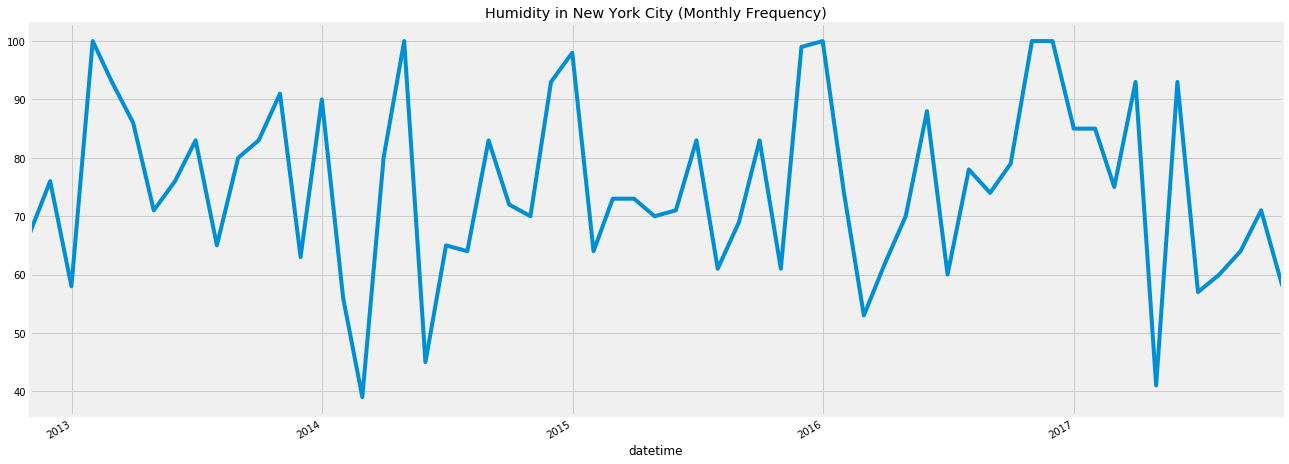

In [10]:
# Visualizing humidity data for New York City
humidity['New York'].asfreq('M').plot(figsize=(20,8))
plt.title('Humidity in New York City (Monthly Frequency)')
plt.show()

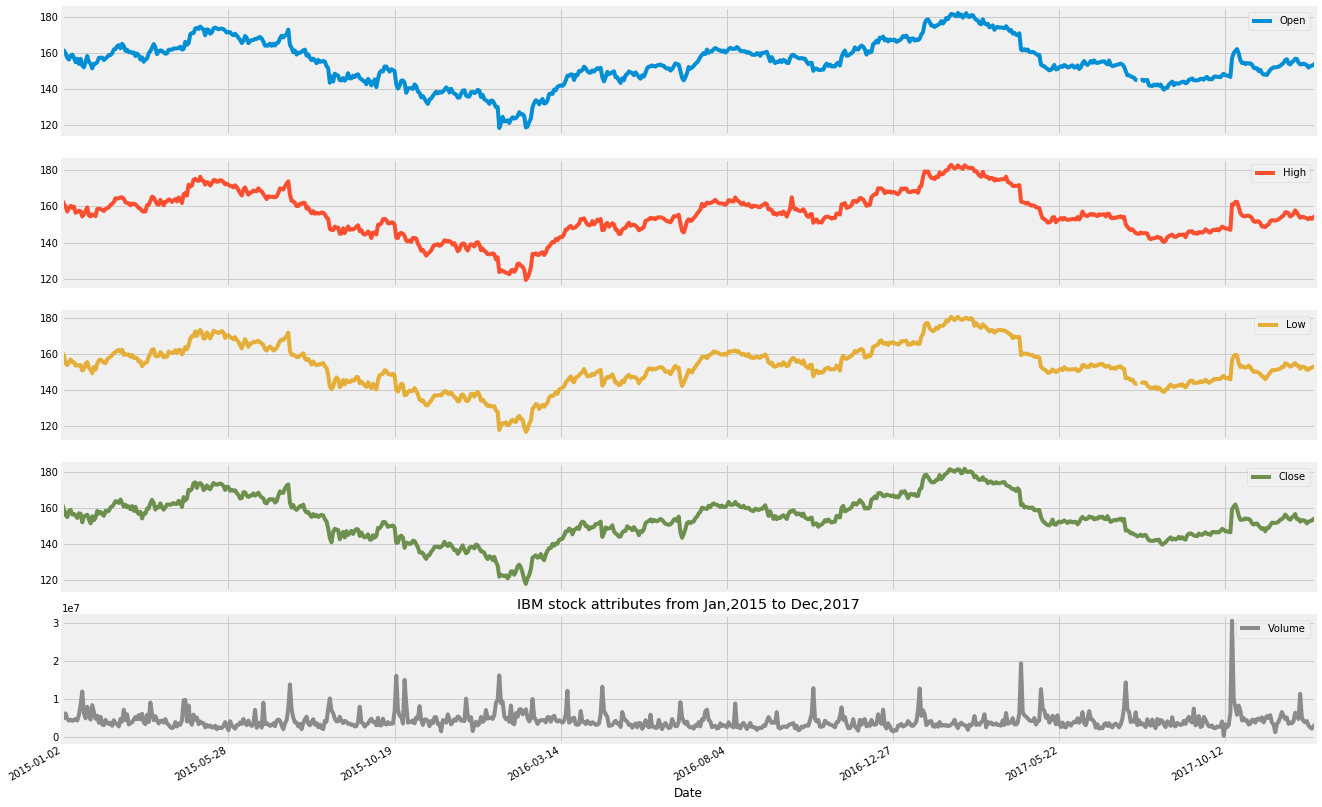

In [11]:
ibm['2015':].plot(subplots=True, figsize=(20,15))
plt.title('IBM stock attributes from Jan,2015 to Dec,2017')
# plt.savefig('stocks.png')
plt.show()

### Shifting and lags

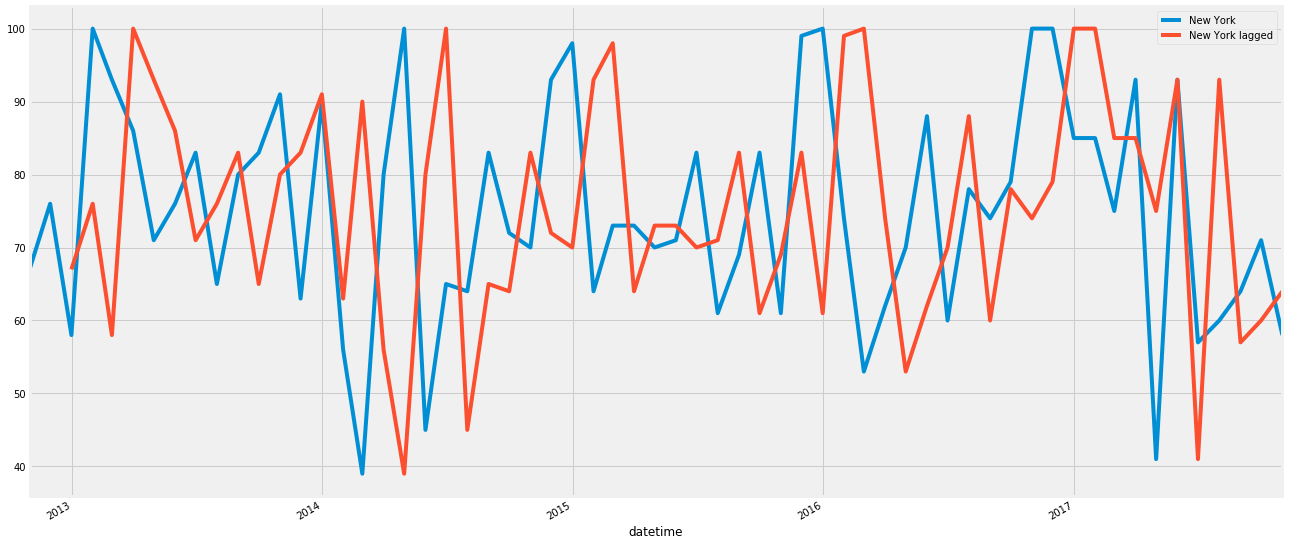

In [12]:
humidity['New York'].asfreq('M').plot(figsize=(20,10),legend=True)
shifted = humidity['New York'].asfreq('M').shift(2).plot(legend=True)
shifted.legend(['New York','New York lagged'])
plt.show()

## Resampling
- Upsampling - Time series is resampled from low frequency to high frequency(Monthly to daily frequency). It involves 
  filling or interpolating missing data

- Downsampling - Time series is resampled from high frequency to low frequency(Weekly to monthly frequency). It  
  involves aggregation of existing data.

In [13]:
down_humidity = humidity.resample('2D').mean()
print(down_humidity.shape)
down_humidity.head()

(944, 36)


,Vancouver,Portland,San Francisco,Seattle,Los Angeles,San Diego,Las Vegas,Phoenix,Albuquerque,Denver,...,Philadelphia,New York,Montreal,Boston,Beersheba,Tel Aviv District,Eilat,Haifa,Nahariyya,Jerusalem
datetime,,,,,,,,,,,,,,,,,,,,,
2012-10-01,77.657143,69.885714,71.314286,69.200000,72.171429,70.285714,17.600000,23.714286,42.542857,62.857143,...,58.828571,52.314286,56.028571,68.514286,67.228571,67.571429,30.457143,52.714286,52.714286,51.885714
2012-10-03,60.583333,58.687500,53.625000,53.270833,55.750000,67.666667,15.312500,18.916667,27.541667,26.041667,...,83.916667,81.770833,93.666667,85.395833,71.500000,70.916667,48.312500,70.312500,70.500000,62.833333
2012-10-05,43.145833,40.250000,71.604167,48.958333,72.645833,71.395833,16.645833,26.791667,19.416667,57.541667,...,76.833333,82.041667,91.729167,71.020833,65.291667,65.187500,47.479167,67.750000,67.750000,65.875000
2012-10-07,53.270833,37.125000,71.812500,50.562500,73.916667,72.625000,18.604167,25.604167,41.041667,76.687500,...,66.604167,64.354167,76.145833,74.729167,61.791667,63.625000,39.395833,64.666667,64.666667,61.437500
2012-10-09,69.375000,59.083333,74.354167,64.854167,73.312500,67.020833,18.833333,33.375000,29.562500,31.958333,...,74.916667,73.312500,78.916667,82.020833,62.708333,68.000000,41.166667,62.875000,62.875000,61.500000


In [14]:
up_humidity = down_humidity.resample('D').fillna(method='ffill')
print(up_humidity.shape)
up_humidity.head()

(1887, 36)


,Vancouver,Portland,San Francisco,Seattle,Los Angeles,San Diego,Las Vegas,Phoenix,Albuquerque,Denver,...,Philadelphia,New York,Montreal,Boston,Beersheba,Tel Aviv District,Eilat,Haifa,Nahariyya,Jerusalem
datetime,,,,,,,,,,,,,,,,,,,,,
2012-10-01,77.657143,69.885714,71.314286,69.200000,72.171429,70.285714,17.600000,23.714286,42.542857,62.857143,...,58.828571,52.314286,56.028571,68.514286,67.228571,67.571429,30.457143,52.714286,52.714286,51.885714
2012-10-02,77.657143,69.885714,71.314286,69.200000,72.171429,70.285714,17.600000,23.714286,42.542857,62.857143,...,58.828571,52.314286,56.028571,68.514286,67.228571,67.571429,30.457143,52.714286,52.714286,51.885714
2012-10-03,60.583333,58.687500,53.625000,53.270833,55.750000,67.666667,15.312500,18.916667,27.541667,26.041667,...,83.916667,81.770833,93.666667,85.395833,71.500000,70.916667,48.312500,70.312500,70.500000,62.833333
2012-10-04,60.583333,58.687500,53.625000,53.270833,55.750000,67.666667,15.312500,18.916667,27.541667,26.041667,...,83.916667,81.770833,93.666667,85.395833,71.500000,70.916667,48.312500,70.312500,70.500000,62.833333
2012-10-05,43.145833,40.250000,71.604167,48.958333,72.645833,71.395833,16.645833,26.791667,19.416667,57.541667,...,76.833333,82.041667,91.729167,71.020833,65.291667,65.187500,47.479167,67.750000,67.750000,65.875000


## Percent Change

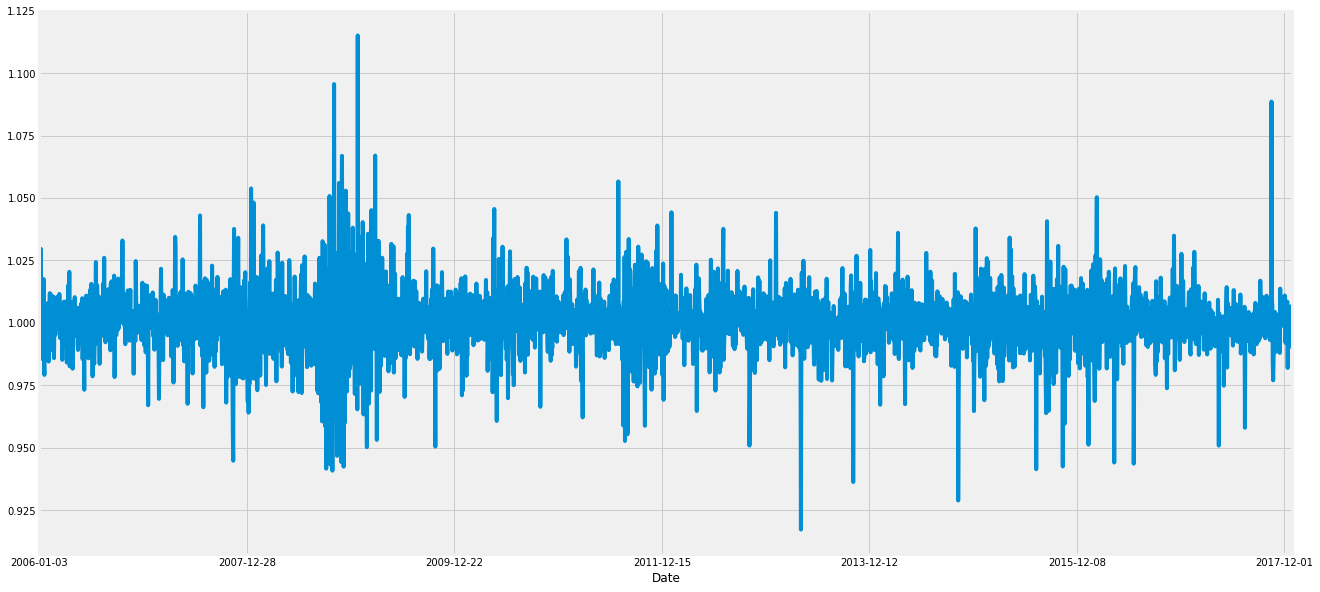

In [517]:
# ibm_df.High.plot(figsize=(20,10))
ibm['change'] = ibm.Close.div(ibm.Close.shift(1))
ibm['change'].plot(figsize=(20,10))
# google['Change'].plot(figsize=(20,8))

## Returns

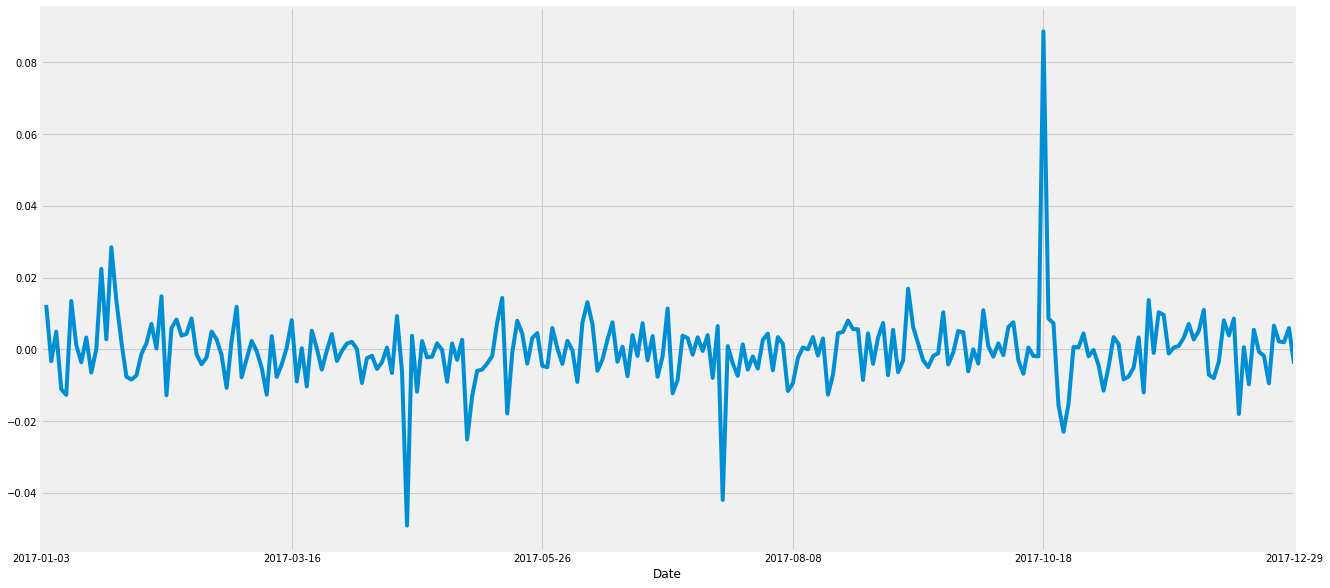

In [591]:
ibm[ibm.index > '2017-01-01'].Close.pct_change().plot(figsize=(20,10))

## Comparing top tech giants

<function matplotlib.pyplot.show(*args, **kw)>

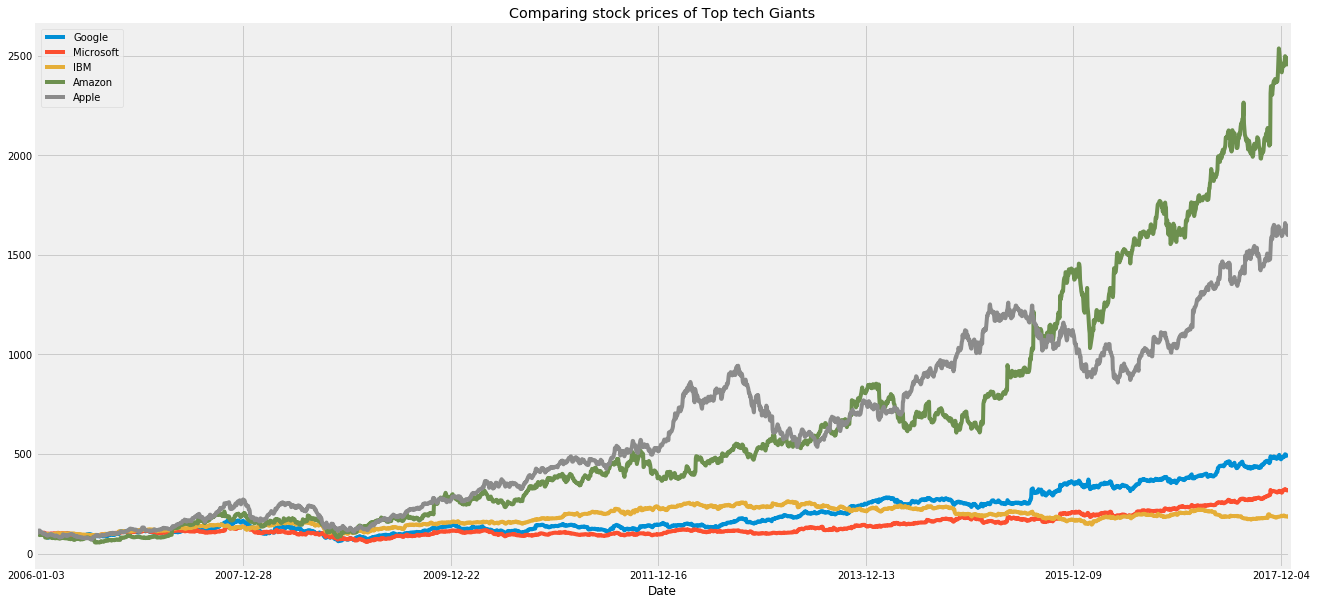

In [605]:
# Google 
google = pd.read_csv('GOOGL_2006-01-01_to_2018-01-01.csv', index_col=0)
google.High.div(google.High.iloc[0]).mul(100).plot(figsize=(20,10))

# Microsoft
msft = pd.read_csv('MSFT_2006-01-01_to_2018-01-01.csv', index_col=0)
msft.High.div(msft.High.iloc[0]).mul(100).plot(figsize=(20,10))

#IBM
ibm.High.div(ibm.High.iloc[0]).mul(100).plot(figsize=(20,10))

#Amazon
amazon = pd.read_csv('AMZN_2006-01-01_to_2018-01-01.csv', index_col=0)
amazon.High.div(amazon.High.iloc[0]).mul(100).plot(figsize=(20,10))


# Apple
apple = pd.read_csv('AAPL_2006-01-01_to_2018-01-01.csv', index_col=0)
apple.High.div(apple.High.iloc[0]).mul(100).plot(figsize=(20,10))

plt.title('Comparing stock prices of Top tech Giants')
plt.legend(['Google', 'Microsoft', 'IBM','Amazon', 'Apple'])
plt.show

## Check for Stationarity
- A stationary time series is one whose statistical properties such as mean, variance, autocorrelation, etc. are all constant over time.
- Stationarity is important as non-stationary series that depend on time have too many parameters to account for when modelling the time series. diff() method can easily convert a non-stationary series to a stationary series.

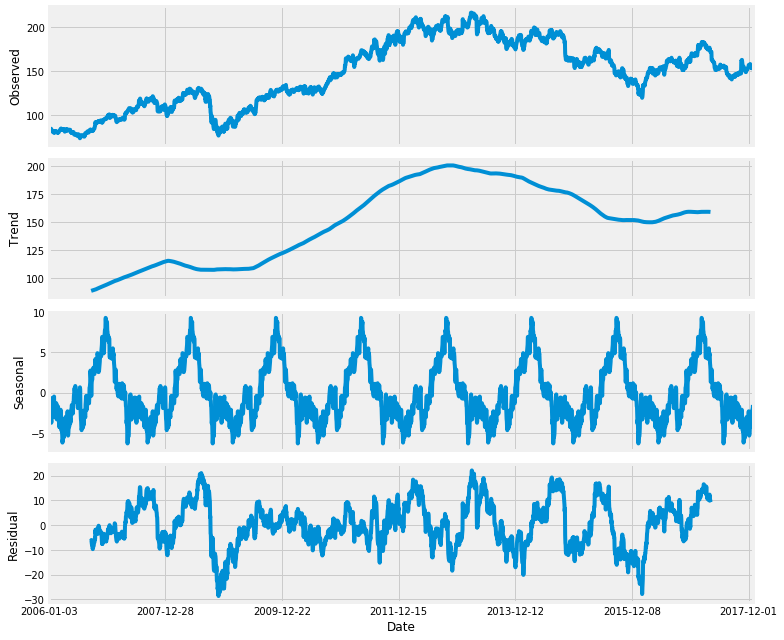

In [75]:
# Now, for decomposition...
rcParams['figure.figsize'] = 11, 9
decomposed_ibm = sm.tsa.seasonal_decompose(ibm["High"],freq=365) # The frequncy is annual
figure = decomposed_ibm.plot()
plt.show()

# Autocorrelation

- We can calculate the correlation for time series observations with observations with previous time steps, called lags.

### Interpretation
- If autocorrelation values are close to 0, then values between consecutive observations are not correlated with one another. Inversely, autocorrelations values close to 1 or -1 indicate that there exists strong positive or negative correlations between consecutive observations, respectively.

- In order to help you asses how trustworthy these autocorrelation values are, the plot_acf() function also returns confidence intervals (represented as blue shaded regions). If an autocorrelation value goes beyond the confidence interval region, you can assume that the observed autocorrelation value is statistically significant.

* Partial Autocorrelation  - The partial autocorrelation function can be interpreted as a regression of the series against its past lags. The terms can be interpreted the same way as a standard linear regression, that is the contribution of a change in that particular lag while holding others constant.

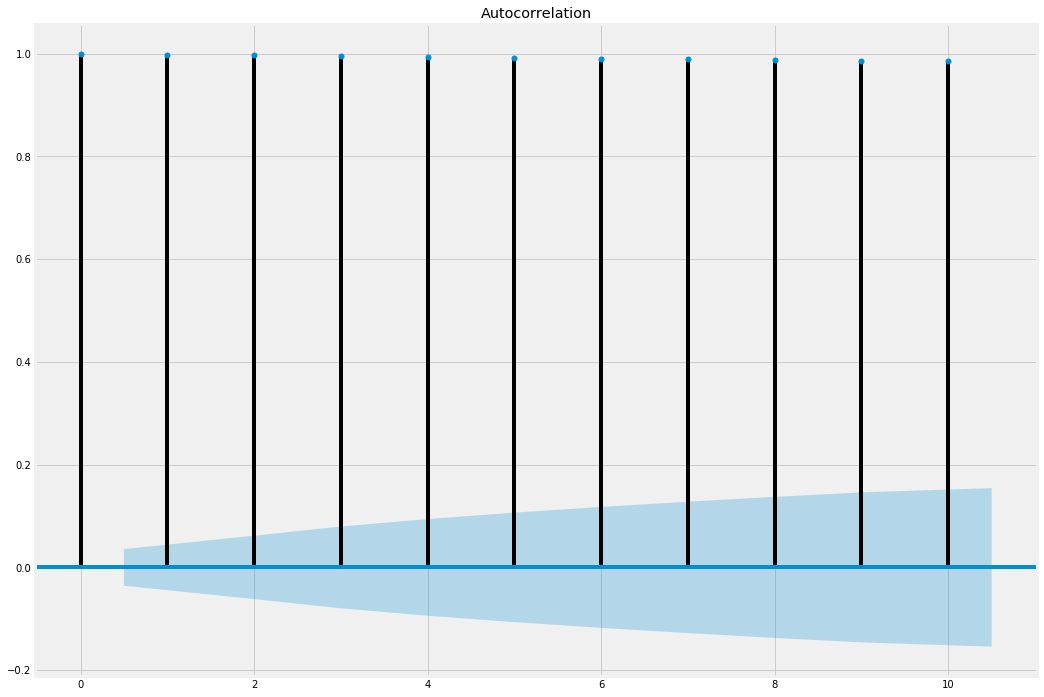

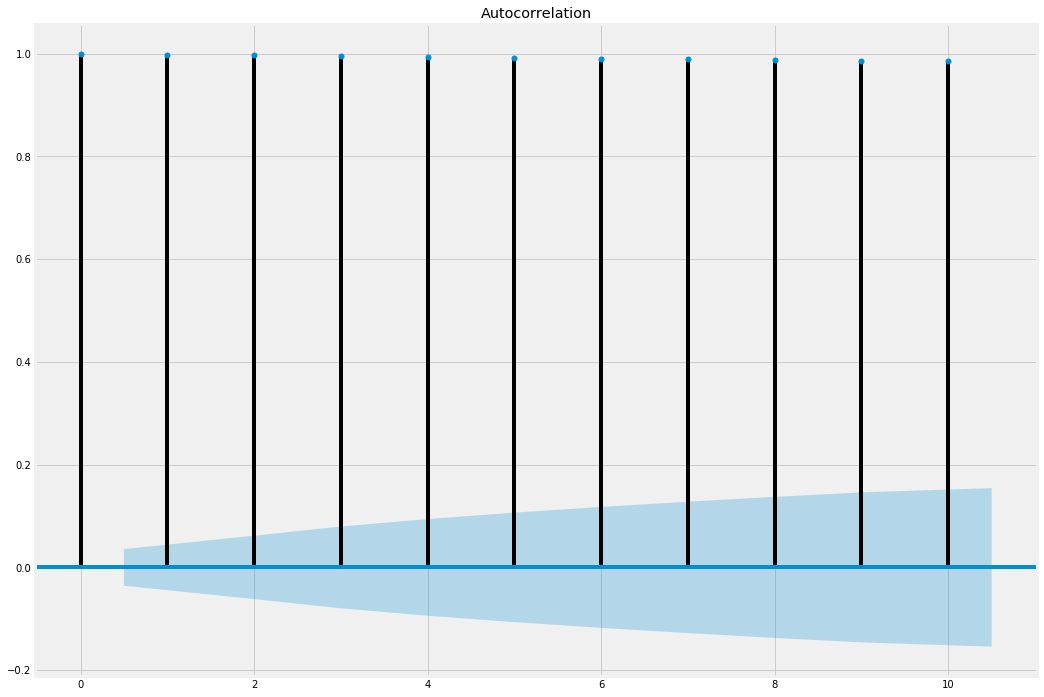

In [653]:
from matplotlib import pyplot
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(ibm.Close, lags=10)

- As all lags are either close to 1 or at least greater than the confidence interval, they are statistically significant. 

# Partial Autocorrelation Function

- A partial autocorrelation is a summary of the relationship between an observation in a time series with observations at prior time steps with the relationships of intervening observations removed.

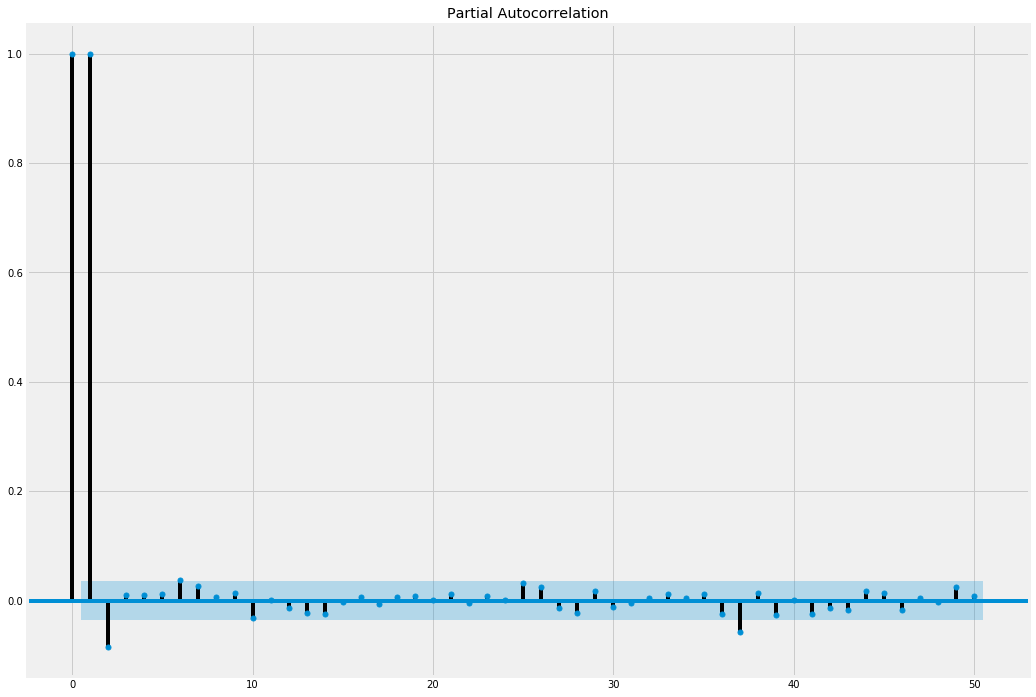

In [613]:
plot_pacf(ibm.High,lags=50)
plt.show()

#  Time series decomposition and Random walks
### Trends, seasonality and noise
- These are the components of a time series

- Trend - Consistent upwards or downwards slope of a time series
- Seasonality - Clear periodic pattern of a time series(like sine funtion)
- Noise - Outliers or missing values

# Modeling


## AR models
An autoregressive (AR) model is a representation of a type of random process; as such, it is used to describe certain time-varying processes in nature, economics, etc. The autoregressive model specifies that the output variable depends linearly on its own previous values and on a stochastic term (an imperfectly predictable term); thus the model is in the form of a stochastic difference equation.

- AR(1) model: 
  Rt = μ + ϕRt-1 + εt

As RHS has only one lagged value (Rt-1) this is called AR model of order 1 where μ is mean and ε is noise at time t
- If ϕ = 1, it is random walk.
- If ϕ = 0, it is white noise. 
- If -1 < ϕ < 1, it is stationary.


- AR(2) model: Rt = μ + ϕ1Rt-1 + ϕ2Rt-2 + εt

- AR(3) model: Rt = μ + ϕ1Rt-1 + ϕ2Rt-2 + ϕ3Rt-3 + εt

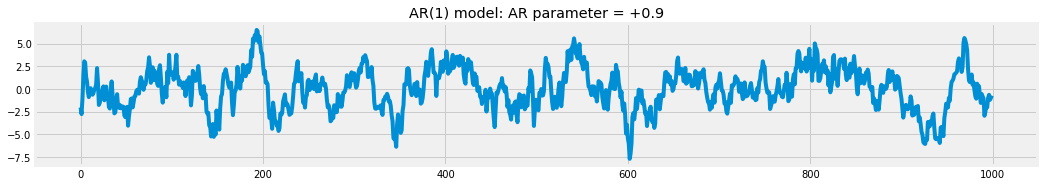

In [76]:
# AR(1) MA(1) model:AR parameter = +0.9
rcParams['figure.figsize'] = 16, 12
plt.subplot(4,1,1)
ar1 = np.array([1, -0.9]) # We choose -0.9 as AR parameter is +0.9
ma1 = np.array([1])
AR1 = ArmaProcess(ar1, ma1)
sim1 = AR1.generate_sample(nsample=1000)
plt.title('AR(1) model: AR parameter = +0.9')
plt.plot(sim1)

In [77]:
model = ARMA(sim1, order=(1,0))
result = model.fit()
print(result.summary())
print("μ={} ,ϕ={}".format(result.params[0],result.params[1]))

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                 1000
Model:                     ARMA(1, 0)   Log Likelihood               -1376.855
Method:                       css-mle   S.D. of innovations              0.958
Date:                Sun, 22 Sep 2019   AIC                           2759.709
Time:                        00:55:59   BIC                           2774.433
Sample:                             0   HQIC                          2765.305
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0130      0.317     -0.041      0.967      -0.634       0.608
ar.L1.y        0.9053      0.013     67.878      0.000       0.879       0.931
                                    Roots           

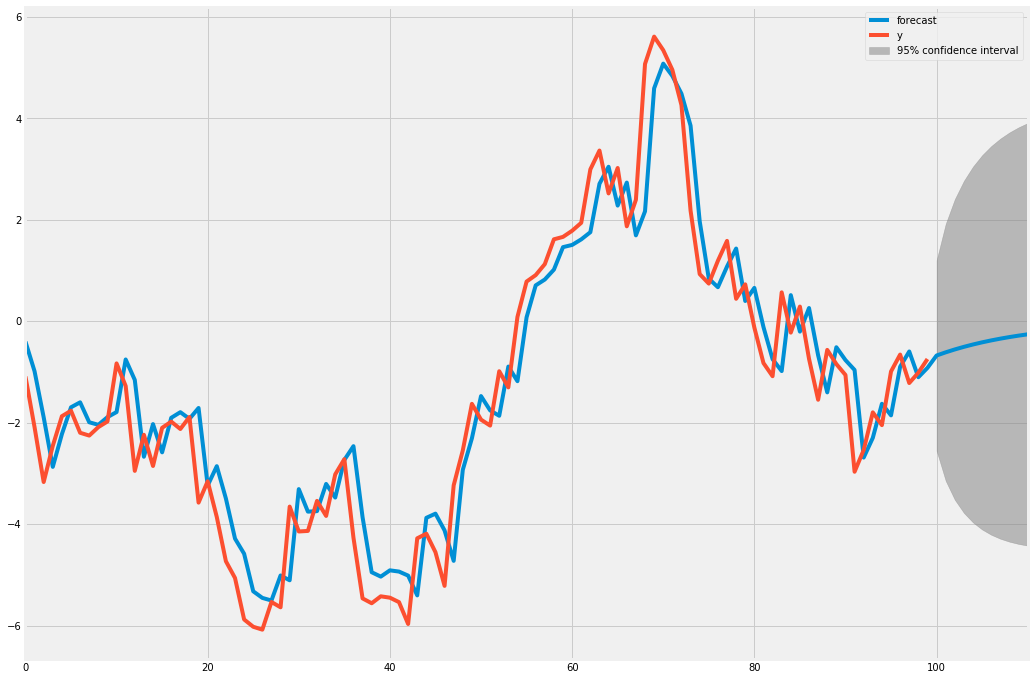

In [78]:
result.plot_predict(start=900, end=1010)
plt.show()

In [79]:
rmse = math.sqrt(mean_squared_error(sim1[900:1011], result.predict(start=900,end=999)))
print("The root mean squared error is {}.".format(rmse))

The root mean squared error is 0.8532860289805512.


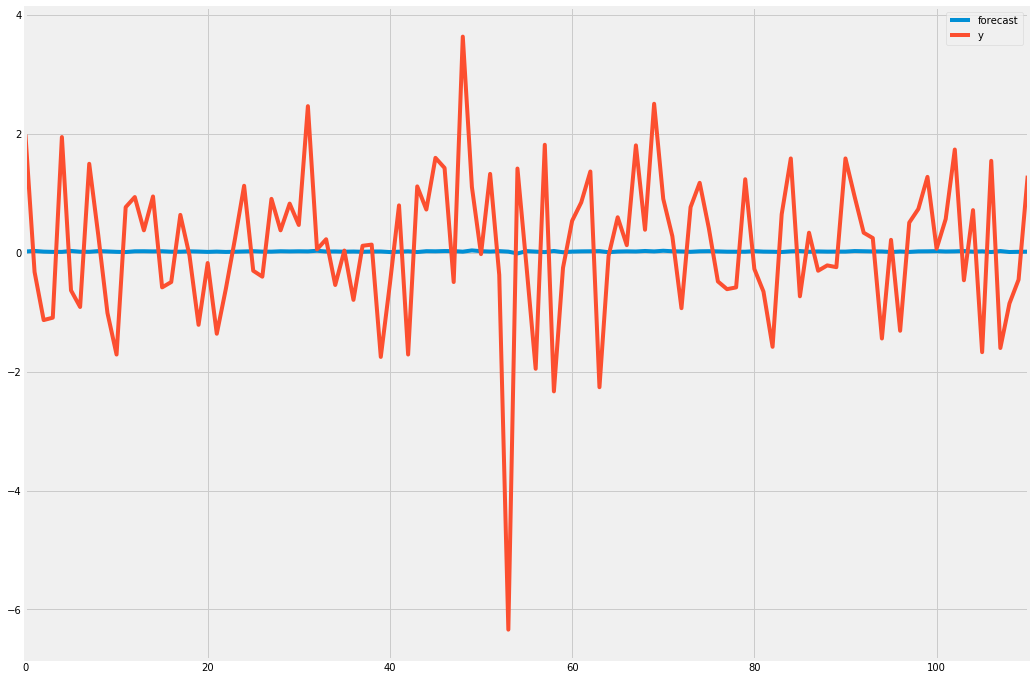

In [615]:
# Predicting closing prices of google
ibm_stock_pred = ARMA(ibm["Close"].diff().iloc[1:].values, order=(1,0))
res = ibm_stock_pred.fit()
res.plot_predict(start=900, end=1010)
plt.show()

In [630]:
def get_train_test_index(Ser,date):
    """
    Splits the data into train, test based on start date of test period
    """
    train = Ser[Ser.index < date]
    test = Ser[Ser.index >= date]
    return train, test

Ser = ibm.Close
train, test = get_train_test_index(Ser, date='2017-01-06')

INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


Test MSE: 1.3328217736323995


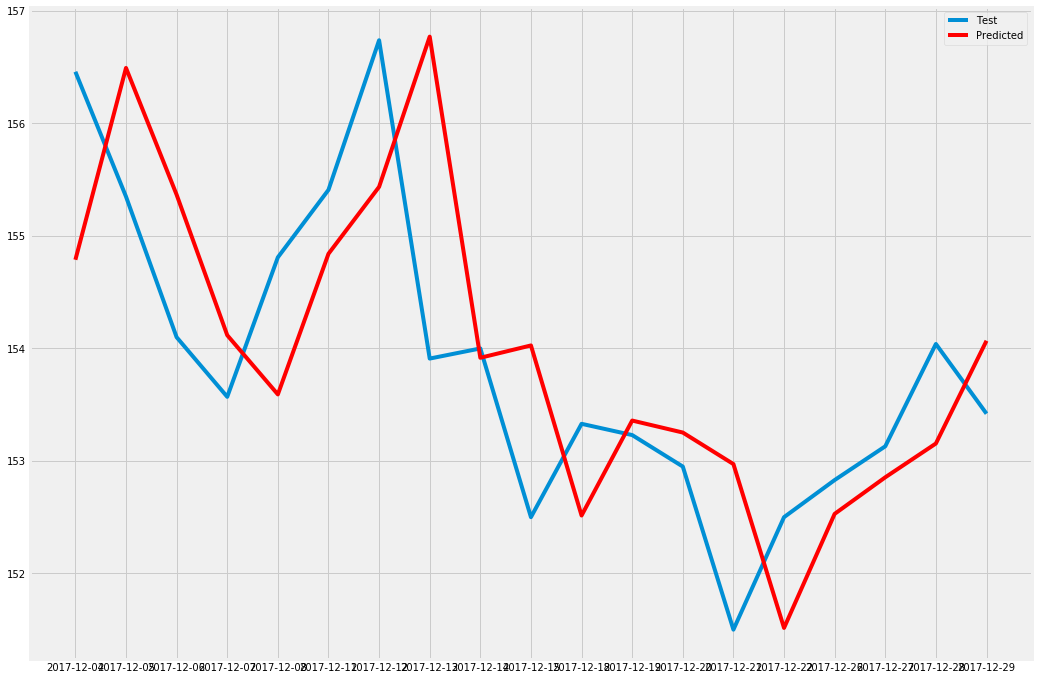

In [654]:
from sklearn.metrics import mean_squared_error

# Predict stock prices for Dec'17

training_period_date = '2017-12-02'
train, test = get_train_test_index(Ser,training_period_date)
history = [x for x in train]
prediction = []
for t in range(len(test)): #Looping through each test period 
    model = ARIMA(history, order = (1,1,1))
    model_fit  = model.fit(disp=0)
    output = model_fit.forecast()
    y_hat = output[0]
    prediction.append(y_hat)
    obs = test[t]
    history.append(obs)
#     print(f'predicted : {y_hat}, Expected : {obs}')
error = mean_squared_error(test, prediction)
print(f'Test MSE: {error}')
plt.plot(test)
plt.plot(prediction, color='red')
plt.legend(['Test', 'Predicted'])
plt.show()

# Facebook's Prophet for TS prediction

In [632]:
from fbprophet import Prophet

# set the uncertainty interval to 95% (the Prophet default is 80%)
my_model = Prophet(interval_width=0.95)

prophet_df = ibm.reset_index().rename({"Date":"ds", "Close":"y"}, axis=1)[["ds", "y"]]
my_model.fit(prophet_df)

# Creating prediction set
future_dates = my_model.make_future_dataframe(periods=30, freq='D')
future_dates.tail()

# Forecasting
# ds: the datestamp of the forecasted value
# yhat: the forecasted value of our metric
# yhat_lower: the lower bound of our forecasts
# yhat_upper: the upper bound of our forecasts


# Note: Prophet uses Markov chain Monte Carlo (MCMC) for forecasts, so there will be variation in results everytime.

forecast = my_model.predict(future_dates)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(30)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds,yhat,yhat_lower,yhat_upper
3020,2017-12-30,156.987909,142.075437,172.509505
3021,2017-12-31,157.000815,141.523108,173.034863
3022,2018-01-01,154.748503,138.583297,170.041100
3023,2018-01-02,154.842916,138.464260,171.117240
3024,2018-01-03,154.830692,139.487400,171.414084
3025,2018-01-04,154.960270,139.836317,171.286804
3026,2018-01-05,154.803358,139.014269,170.078763
3027,2018-01-06,157.143722,140.819707,172.494964
3028,2018-01-07,157.182763,141.901179,171.323852
3029,2018-01-08,154.959415,140.453077,170.112756


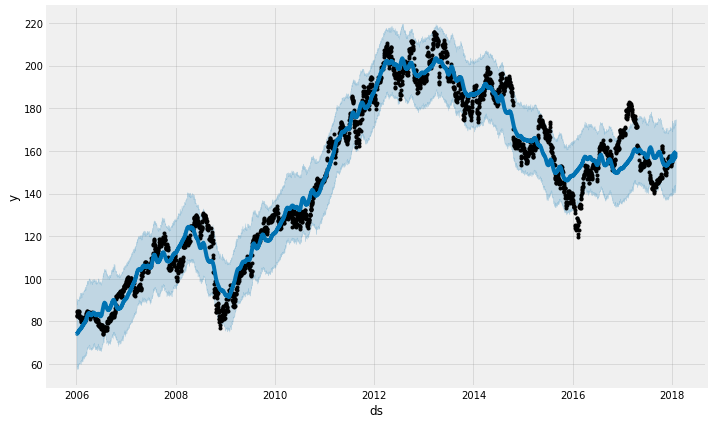

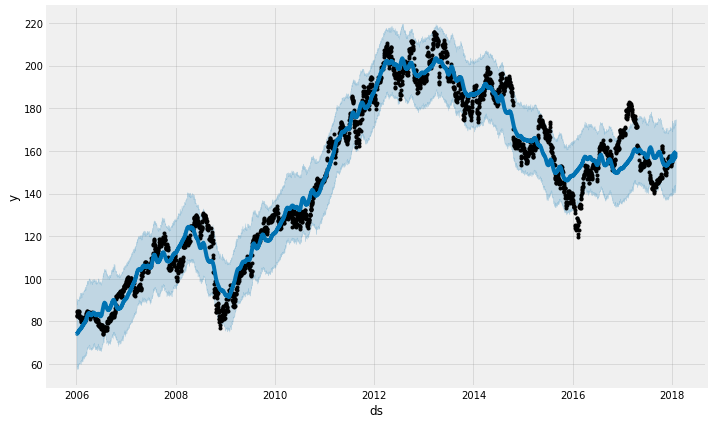

In [232]:
my_model.plot(forecast, uncertainty=True)

# Prophet plots the observed values of our time series (the black dots)
# the forecasted values (blue line) and the uncertainty intervals of our forecasts (the blue shaded regions).

- Since cycles in stock market we want to figure out are not limited to yearly, weekly or daily, we should define our own cycles and find out which can fit the data better. Besides, we should not use weekly seasonality since there is no trading on weekend.

In [234]:
m = Prophet(weekly_seasonality=False,yearly_seasonality=False)
m.add_seasonality('self_define_cycle', period=8, fourier_order=8, mode='additive')

In [637]:
from math import sqrt
def cycle_analysis(data, split_date, cycle, mode='additive', forecast_plot = False, print_ind=False):
    
    # Create train / test data
    train = data[:split_date].iloc[:-1,]
    print(f'Training period: {train.index[0], train.index[-1]}')
    
    test = data[split_date:]
    print(f'Training period: {test.index[0], test.index[-1]}')
    
    test.index = pd.to_datetime(test.index)
    
    predict_period = len(pd.date_range(split_date, max(data.index)))
    
    df = train.reset_index()
    df.columns = ['ds','y']
    
    m = Prophet(weekly_seasonality=True,yearly_seasonality=False,daily_seasonality=False)
    m.add_seasonality('self_define_cycle',period=cycle,fourier_order=8,mode=mode)
    m.fit(df)
    
    future = m.make_future_dataframe(periods=predict_period)
    forecast = m.predict(future)
    
    if forecast_plot:
        m.plot(forecast)
        plt.plot(test.index,test.values,'.',color='#ff3333',alpha=0.6)
        plt.xlabel('Date',fontsize=12,fontweight='bold',color='gray')
        plt.ylabel('Price',fontsize=12,fontweight='bold',color='gray')
        plt.show()
        
    ret = max(forecast.self_define_cycle)-min(forecast.self_define_cycle)
    
    model_tb = forecast['yhat']
    model_tb.index = forecast['ds'].map(lambda x:x.strftime("%Y-%m-%d"))
    out_tb = pd.concat([test, model_tb],axis=1, sort=False)
    
#     print(out_tb)
    
    out_tb = out_tb[~out_tb.iloc[:,0].isnull()]
    out_tb = out_tb[~out_tb.iloc[:,1].isnull()]
    
    mse = mean_squared_error(out_tb.iloc[:,0], out_tb.iloc[:,1])
    rep = [ret, mse]
    
    if print_ind:
        print("Projected return per cycle: {}".format(round(rep[0],2)))
        print("RMSE: {}".format(round(sqrt(rep[1]),4)))
    
    return rep

Training period: ('2014-06-02', '2017-10-31')
Training period: ('2017-11-01', '2017-12-29')


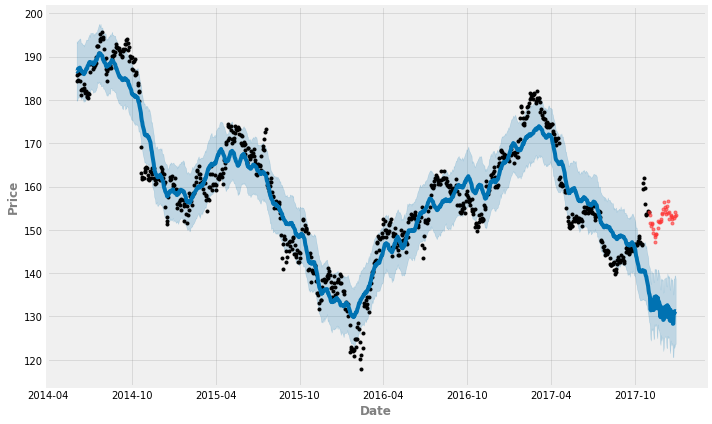

Projected return per cycle: 7.57
RMSE: 20.0723


In [652]:
ibm_returns = cycle_analysis(ibm.Close[ibm.index>'2014-06-01'], '2017-11-01', cycle=180, mode='additive',
               forecast_plot = True, print_ind=True)

Training period: ('2014-06-03', '2017-10-31')
Training period: ('2017-11-01', '2017-12-29')


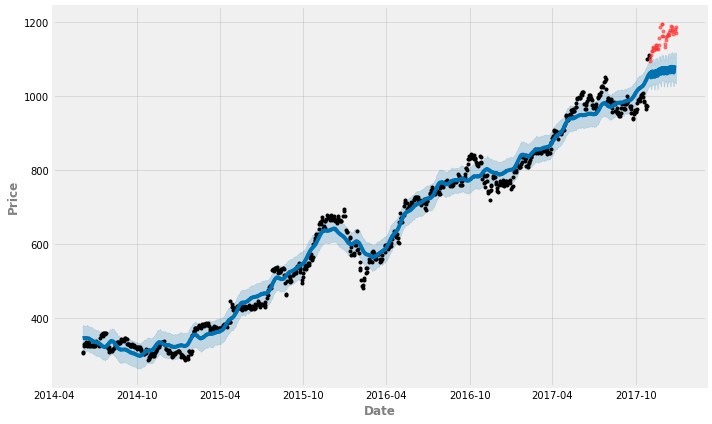

Projected return per cycle: 43.19
RMSE: 84.279


In [651]:
amazon_returns =  cycle_analysis(amazon.Close[amazon.index>'2014-06-02'], '2017-11-01', 
                                 cycle=180, mode='additive', forecast_plot = True, print_ind=True)

Training period: ('2014-06-03', '2017-05-31')
Training period: ('2017-06-01', '2017-12-29')


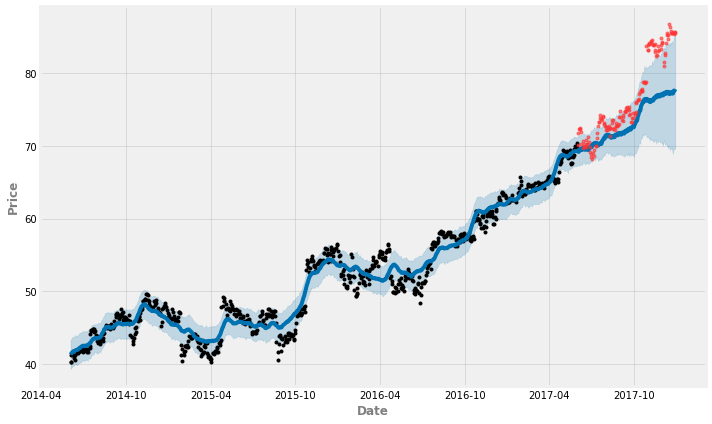

Projected return per cycle: 2.68
RMSE: 4.3016


In [650]:
msft_returns = cycle_analysis(msft.Close[msft.index>'2014-06-02'], '2017-06-01', cycle=180,
                                 mode='additive', forecast_plot = True, print_ind = True)

Training period: ('2014-06-03', '2017-05-31')
Training period: ('2017-06-01', '2017-12-29')


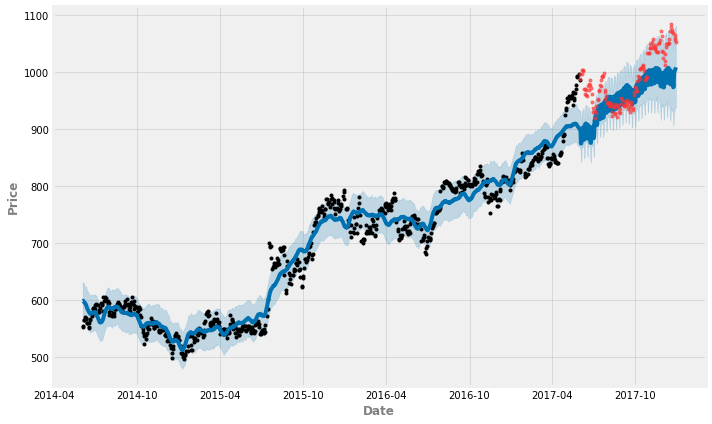

Projected return per cycle: 36.19
RMSE: 42.9177


In [648]:
google_returns = cycle_analysis(google.Close[google.index>'2014-06-02'], '2017-06-01', cycle=180,
                                 mode='additive', forecast_plot = True, print_ind = True)

# Understanding effect of tweets on Stock Prices

In [500]:
import tweepy
import re
import jsonpickle

from tweepy import OAuthHandler

# Setup access API
def connect_to_twitter_OAuth():
    consumer_api_key = 'PiiHB6E27r4CmqWJgSTISGHbL'
    consumer_api_secret = 'jBlolQXKuZM8Qqmrz4of0vltss6IJx4ndOM0VZQf9bBpQXpHbn' 
    access_token = '148054901-ZB3kFyazdpAvV6x19IElkGEVZ5iHB43qPLI0XXVT'
    access_token_secret ='2zXooUBLzubEDgDSitnyeXeO3MvXBj9lAQLtQLfowsWaG'
    
    auth = tweepy.OAuthHandler(consumer_api_key, consumer_api_secret)
    auth.set_access_token(access_token, access_token_secret)
    
    api = tweepy.API(auth)
    return api 


api = connect_to_twitter_OAuth()

In [520]:
import tweepy
import re
import json 
import jsonpickle


from tweepy import OAuthHandler

# Setup access API
def connect_to_twitter_OAuth():
    consumer_api_key = 'PiiHB6E27r4CmqWJgSTISGHbL'
    consumer_api_secret = 'jBlolQXKuZM8Qqmrz4of0vltss6IJx4ndOM0VZQf9bBpQXpHbn' 
    access_token = '148054901-ZB3kFyazdpAvV6x19IElkGEVZ5iHB43qPLI0XXVT'
    access_token_secret ='2zXooUBLzubEDgDSitnyeXeO3MvXBj9lAQLtQLfowsWaG'
    
    auth = tweepy.OAuthHandler(consumer_api_key, consumer_api_secret)
    auth.set_access_token(access_token, access_token_secret)
    
    api = tweepy.API(auth)
    return api 


api = connect_to_twitter_OAuth()

def get_save_tweets(api, query, max_tweets=100000, lang='en'):
    listOfTweets=[]
    # Query tweets
    for tweet in tweepy.Cursor(api.search, q=query, lang=lang).items(max_tweets):
        dict_ = {
            'User Name': tweet.user.name,
            'Tweet Created at' : tweet.created_at,
            'Text' : tweet.text,
            'Retweeted': tweet.retweeted,
            'Replied': tweet.in_reply_to_status_id_str
                }
        listOfTweets.append(dict_)
        
    return pd.DataFrame(listOfTweets)

# ------------------------------------------------------------------------

ibm_query = 'ibm OR redhat OR kenexa OR filenet OR IBMCloud'

# Get the tweets
ibm_tweets_df = get_save_tweets(api, ibm_query, max_tweets=100000, lang='en')

In [523]:
ibm_tweets_df

,User Name,Tweet Created at,Text,Retweeted,Replied
0,The IBM MSP Team,2019-09-26 14:00:21,No one needs to be told that being able to pre...,False,None
1,Dr. Roy Schestowitz (罗伊),2019-09-26 14:00:19,"Server: #Openwashing , #Containous and #RedHat...",False,None
2,Susan Bincoletto,2019-09-26 14:00:18,Fun and educational morning @IBMResearch #Zuri...,False,None
3,Red Hat AR,2019-09-26 14:00:15,#RedHat @Ansible Automation Platform allows yo...,False,None
4,DJ SEMANTIC,2019-09-26 14:00:07,"RT @kennedydee: ""Deploying Good Tech, Innovati...",False,None
...,...,...,...,...,...
2247,Anonymous🐾🎗️ 🏴,2019-09-26 08:53:51,"RT @campuscodi: Now, this is what I call an es...",False,None
2248,Girish Prajapati,2019-09-26 08:53:41,RT @PMOIndia: I went to the meeting (with PM @...,False,None
2249,(((Sarah🕯Rachel🕯Jacobs))),2019-09-26 08:53:28,@EndlessJeopardy Who is IBM Pei,False,1177142109586874368
2250,Rachna Bhanot,2019-09-26 08:53:12,IBM’s FIT TO WIN journey towards accelerating ...,False,None


In [527]:
ibm_tweets_df['label'] = None
ibm_tweets_df

,User Name,Tweet Created at,Text,Retweeted,Replied,label
0,The IBM MSP Team,2019-09-26 14:00:21,No one needs to be told that being able to pre...,False,None,None
1,Dr. Roy Schestowitz (罗伊),2019-09-26 14:00:19,"Server: #Openwashing , #Containous and #RedHat...",False,None,None
2,Susan Bincoletto,2019-09-26 14:00:18,Fun and educational morning @IBMResearch #Zuri...,False,None,None
3,Red Hat AR,2019-09-26 14:00:15,#RedHat @Ansible Automation Platform allows yo...,False,None,None
4,DJ SEMANTIC,2019-09-26 14:00:07,"RT @kennedydee: ""Deploying Good Tech, Innovati...",False,None,None
...,...,...,...,...,...,...
2247,Anonymous🐾🎗️ 🏴,2019-09-26 08:53:51,"RT @campuscodi: Now, this is what I call an es...",False,None,None
2248,Girish Prajapati,2019-09-26 08:53:41,RT @PMOIndia: I went to the meeting (with PM @...,False,None,None
2249,(((Sarah🕯Rachel🕯Jacobs))),2019-09-26 08:53:28,@EndlessJeopardy Who is IBM Pei,False,1177142109586874368,None
2250,Rachna Bhanot,2019-09-26 08:53:12,IBM’s FIT TO WIN journey towards accelerating ...,False,None,None


In [568]:
import re
import nltk
from nltk.tokenize import word_tokenize
from string import punctuation 
from nltk.corpus import stopwords 

class PreProcessTweets:
    def __init__(self):
        self.stopword_list = set(stopwords.words('english')+list(punctuation))
        
        
    def preprocessTweets(self, tweets):
        clean_tweets = None
        try:
            clean_tweets =  tweets.apply(lambda tweet: _processTweet(tweet, self.stopword_list))
            
        except Exception:
            log.exception('Error runningh preprocessTweets')
            
        return clean_tweets
    
    def _processTweet(self, tweet):
        tweet = tweet.lower() # convert text to lower-case
        tweet = re.sub('((www\.[^\s]+)|(https?://[^\s]+))', 'URL', tweet) # remove URLs
        tweet = re.sub('@[^\s]+', 'AT_USER', tweet) # remove usernames
        tweet = re.sub(r'#([^\s]+)', r'\1', tweet) # remove the # in #hashtag
        tweet = word_tokenize(tweet) # remove repeated characters (helloooooooo into hello)
        word_list =  [word for word in tweet if word not in self._stopwords]
        
        return word_list
    

tweetProcessor = PreProcessTweets()
tweet_series = ibm_tweets_df['Text']
preprocessed_tweets = tweetProcessor.preprocessTweets(tweet_series)
ibm_tweets_df['clean_tweets'] = preprocessed_tweets

In [571]:
ibm_tweets_df[['clean_tweets', 'Tweet Created at' ,'label']]

,clean_tweets,Tweet Created at,label
0,"[one, needs, told, able, predict, future, gran...",2019-09-26 14:00:21,None
1,"[server, openwashing, containous, redhat, URL,...",2019-09-26 14:00:19,None
2,"[fun, educational, morning, AT_USER, zurich, l...",2019-09-26 14:00:18,None
3,"[redhat, AT_USER, automation, platform, allows...",2019-09-26 14:00:15,None
4,"[rt, AT_USER, ``, deploying, good, tech, innov...",2019-09-26 14:00:07,None
...,...,...,...
2247,"[rt, AT_USER, call, escalation, magecart, atta...",2019-09-26 08:53:51,None
2248,"[rt, AT_USER, went, meeting, pm, AT_USER, opti...",2019-09-26 08:53:41,None
2249,"[AT_USER, ibm, pei]",2019-09-26 08:53:28,None
2250,"[ibm, ’, fit, win, journey, towards, accelerat...",2019-09-26 08:53:12,None


In [583]:
def buildVocabulary(preprocessed_tweets):
    all_words = []
    
    for words in preprocessed_tweets:
        all_words.extend(words)

    wordlist = nltk.FreqDist(all_words)
    word_features = wordlist.keys()
    
    return word_features

def extract_features(tweet):
    tweet_words=set(tweet)
    features={}
    for word in word_features:
        features['contains(%s)' % word]=(word in tweet_words)
    return features 


In [584]:
ibm_tweets_df['clean_tweets']

0       [one, needs, told, able, predict, future, gran...
1       [server, openwashing, containous, redhat, URL,...
2       [fun, educational, morning, AT_USER, zurich, l...
3       [redhat, AT_USER, automation, platform, allows...
4       [rt, AT_USER, ``, deploying, good, tech, innov...
                              ...                        
2247    [rt, AT_USER, call, escalation, magecart, atta...
2248    [rt, AT_USER, went, meeting, pm, AT_USER, opti...
2249                                  [AT_USER, ibm, pei]
2250    [ibm, ’, fit, win, journey, towards, accelerat...
2251    [rt, AT_USER, 2⃣nd, f2f, sc, meeting, amp, 4th...
Name: clean_tweets, Length: 2252, dtype: object